In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
mpl.rcParams['font.size'] = 20

def cacu_alpha(x,y):
    
    Phi_c= np.arctan(1/(x+1j*y))
    phi_r_c = np.real(Phi_c)
    phi_i_c = np.imag(Phi_c)
    alpha = x*np.sinh(phi_i_c)/(np.sin(phi_r_c))

    return alpha



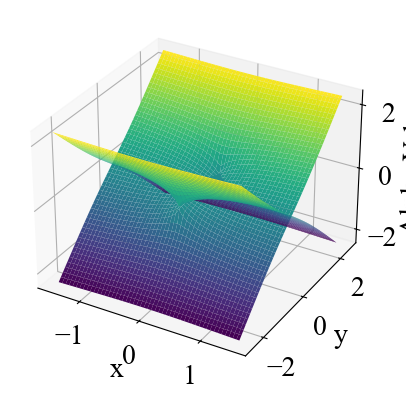

In [2]:
# 定义 x 和 y 的范围
x_range = np.linspace(-1.5, 1.5, num=200)
y_range = np.linspace(-2.5, 2.5, num=200)

# 初始化存储 alpha 值的二维数组
alpha_values = np.zeros((len(x_range), len(y_range)))

# 双循环遍历 x 和 y 的范围
for i, x_val in enumerate(x_range):
    for j, y_val in enumerate(y_range):
        alpha_values[j, i] = cacu_alpha(x_val, y_val)


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 创建一个新的图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 创建网格
X, Y = np.meshgrid(x_range, y_range)
Z = alpha_values

# 绘制三维图
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.plot_surface(X, Y, -Z, cmap='viridis')
# 设置标签
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Alpha Values')
# 显示图形
plt.show()


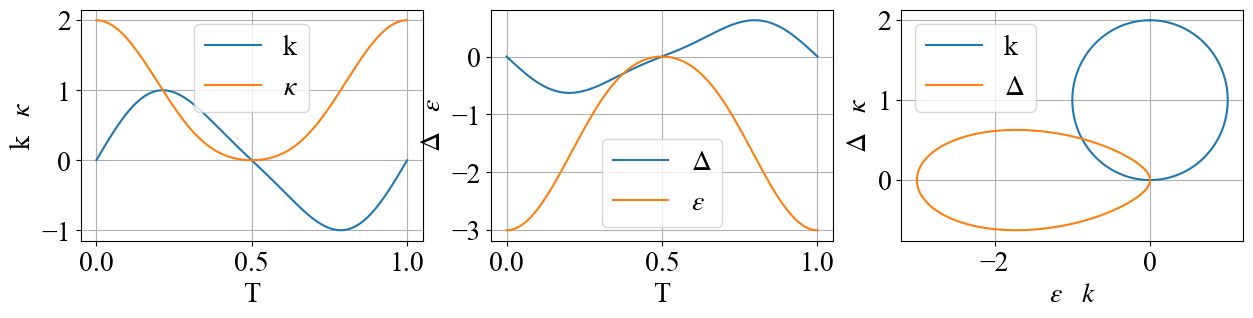

In [100]:
def p_x(r,omega,phi_0,t):
    return r*np.sin(omega*t+phi_0)

def p_y(r,omega,phi_0,t):
    return 1-r*np.cos(omega*t+phi_0)

def cacu_delta(alpha,phi_i,phi_r):
    delta = alpha*np.sinh(phi_i)*np.sin(phi_r)
    return delta

def cacu_epsu(alpha,phi_i,phi_r):
    epsu = alpha*np.cosh(phi_i)*np.cos(phi_r)
    return epsu

def cacu_kappa(alpha,phi_i,phi_r):
    kappa = alpha*np.sinh(phi_i)*np.cos(phi_r)
    return kappa

def cacu_k(alpha,phi_i,phi_r):
    k = alpha*np.cosh(phi_i)*np.sin(phi_r)
    return k

def calculate_fidelity(state1, state2):
    return np.abs(np.dot(state1.conj().T, state2))**2

def full_hami(alpha,phi_i,phi_r):
    k = 2*cacu_k(alpha,phi_i,phi_r)
    delta =2* cacu_delta(alpha,phi_i,phi_r)
    epsu = 2*cacu_epsu(alpha,phi_i,phi_r)
    kappa = 2*cacu_kappa(alpha,phi_i,phi_r)
    hami = np.array([[(epsu-1j*delta),(k+1j*kappa)],[(k+1j*kappa),-(epsu-1j*delta)]])
    return hami

def pseu_hami(alpha,Phi):
    H = alpha*np.array([[np.cos(Phi),np.sin(Phi)],[np.sin(Phi),-np.cos(Phi)]])
    return H

t_list = np.linspace(0,1,1000)
omega = 2*np.pi
r = 0.5
phi_0 = np.pi
delta = []
epsu = []
kappa = []
k = []

for i,t in enumerate(t_list):
    p_x_val = p_x(r,omega,phi_0,t) 
    p_y_val = p_y(r,omega,phi_0,t)
    alpha = cacu_alpha(p_x_val,p_y_val)
    Phi = np.arctan(1/(p_x_val+1j*p_y_val))
    phi_r = np.real(Phi)
    phi_i = np.imag(Phi)
    delta.append(2*cacu_delta(alpha,phi_i,phi_r))
    epsu .append((2*cacu_epsu(alpha,phi_i,phi_r)))
    kappa.append(2*cacu_kappa(alpha,phi_i,phi_r))
    k.append(2*cacu_k(alpha,phi_i,phi_r))

import matplotlib.pyplot as plt

# 创建一个包含三个子图的图形
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

# 在第一个子图上绘制数据
ax1.plot(t_list, k, label='k')
ax1.plot(t_list, kappa, label=f'$\kappa$')
ax1.set_xlabel('T')
ax1.set_ylabel(f'k$\quad\kappa$')
ax1.legend()
ax1.grid()

# 在第二个子图上绘制数据
ax2.plot(t_list, delta, label=f'$\Delta$')
ax2.plot(t_list, epsu, label=f'$\epsilon$')
ax2.set_xlabel('T')
ax2.set_ylabel(f'$\Delta\quad \epsilon$')
ax2.legend()
ax2.grid()

# 在第三个子图上绘制数据
ax3.plot(k, kappa, label='k')
ax3.plot(epsu, delta, label=f'$\Delta$')
ax3.set_xlabel(r'$\epsilon\quad\it{k}$')
ax3.set_ylabel(f'$\Delta\quad\kappa$')
ax3.legend()
ax3.grid()

# 显示图形
plt.show()

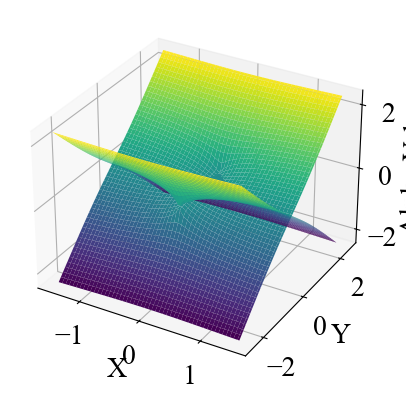

In [4]:
# 定义 x 和 y 的范围
x_range = np.linspace(-1.5, 1.5, num=100)
y_range = np.linspace(-2.5, 2.5, num=100)

# 初始化存储 alpha 值的二维数组
alpha_values = np.zeros((len(x_range), len(y_range)))

# 双循环遍历 x 和 y 的范围
for i, x_val in enumerate(x_range):
    for j, y_val in enumerate(y_range):
        alpha_values[j, i] = cacu_alpha(x_val, y_val)


from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# 创建一个新的图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 创建网格
X, Y = np.meshgrid(x_range, y_range)
Z = alpha_values

# 绘制三维图
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.plot_surface(X, Y, -Z, cmap='viridis')
# 设置标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Alpha Values')

# 显示图形

plt.show()


Initial state:
 [[9.34172359e-01+8.7396206e-18j]
 [2.28806238e-17-3.5682209e-01j]]
Final state:
 [[-0.07064788-0.42468724j]
 [-0.90217881+0.02688925j]]


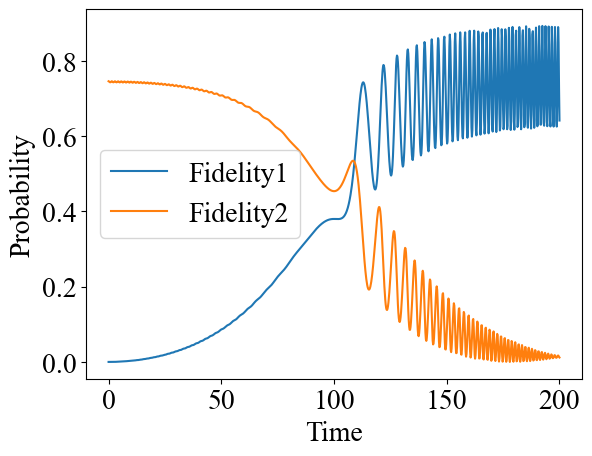

In [58]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

# 定义初始状态 静态矢量~
t = 0
T = 100
N = 1000
omega = np.pi / T
r = 0.5
phi_0 = np.pi
p_x_val = p_x(r, omega, phi_0, t)
p_y_val = p_y(r, omega, phi_0, t)
alpha = cacu_alpha(p_x_val, p_y_val)
Phi_0 = np.arctan(1 / (p_x_val + 1j * p_y_val))
ita1 = np.array([[-np.sin(np.conj(Phi_0) / 2)], [np.cos(np.conj(Phi_0) / 2)]])
ita2 = np.array([[np.cos(np.conj(Phi_0) / 2)], [np.sin(np.conj(Phi_0) / 2)]])
psi0 = Qobj([[np.cos(Phi_0 / 2)], [np.sin(Phi_0 / 2)]])

# 定义哈密顿量随时间的演化

def H_t(t, args):
    omega = args['omega']
    r = args['r']
    phi_0 = args['phi_0']
    p_x_val = p_x(r, omega, phi_0, t)
    p_y_val = p_y(r, omega, phi_0, t)
    alpha = cacu_alpha(p_x_val, p_y_val)
    Phi = np.arctan(1 / (p_x_val + 1j * p_y_val))
    phi_r = np.real(Phi)
    phi_i = np.imag(Phi)
    H = full_hami(alpha, phi_i, phi_r)
    return Qobj(H)

# 测试 H_t 函数
# 定义时间演化参数
args = {'omega': omega, 'r': r, 'phi_0': phi_0}
t_list = np.linspace(0, T * 2, N)
# 计算时间演化
result = sesolve(H_t, psi0, t_list, args=args)

# 提取本征态
states = [state.full() for state in result.states]
# 打印初始和最终状态
print("Initial state:\n", states[0])
print("Final state:\n", states[-1])
# 绘制本征态随时间的演化
plt.figure()
fidelity1 = [calculate_fidelity(ita1, state) for state in states]
fidelity2 = [calculate_fidelity(ita2, state) for state in states]
fidelity1 = np.array(fidelity1).flatten()
fidelity2 = np.array(fidelity2).flatten()
plt.plot(t_list, fidelity1, label='Fidelity1')
plt.plot(t_list, fidelity2, label='Fidelity2')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()


[[1.]]


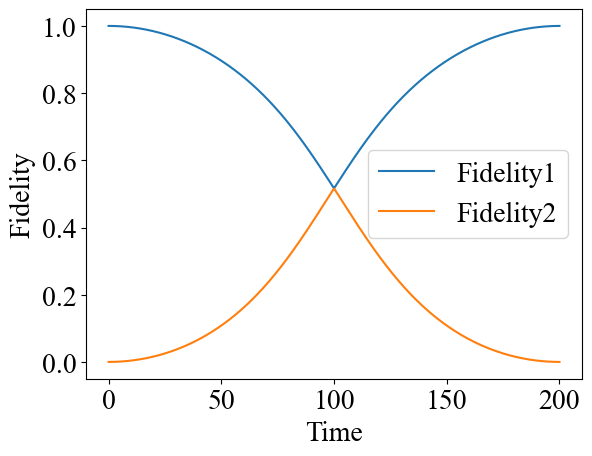

In [59]:
def calculate_fidelity(state1, state2):
    return np.abs(np.dot(state1.conj().T, state2))**2

t_list = np.linspace(0,200,1000)
omega = np.pi/100
r = 0.5
phi_0 = np.pi
delta = []
epsu = []
kappa = []
k = []
Fidelity1 = []
Fidelity2 = []
for i,t in enumerate(t_list):
    p_x_val = p_x(r,omega,phi_0,t) 
    p_y_val = p_y(r,omega,phi_0,t)
    alpha = cacu_alpha(p_x_val,p_y_val)
    Phi = np.arctan(1/(p_x_val+1j*p_y_val))
    phi_r = np.real(Phi)
    phi_i = np.imag(Phi)
    Psi1 = np.array([[-np.sin(Phi/2)], [np.cos(Phi/2)]])
    if i == 0:
        ita1 = np.array([[-np.sin(np.conj(Phi)/2)], [np.cos(np.conj(Phi)/2)]])
        ita2 = np.array([[np.cos(np.conj(Phi)/2)], [np.sin(np.conj(Phi)/2)]])
        print(calculate_fidelity(ita1, Psi1))

    Fidelity1.append(calculate_fidelity(ita1, Psi1))
    Fidelity2.append(calculate_fidelity(ita2, Psi1))

Fidelity1 = np.array(Fidelity1).flatten()
Fidelity2 = np.array(Fidelity2).flatten()
# Flatten Fidelity to make it a 1D array
plt.plot(t_list, Fidelity1, label='Fidelity1')
plt.plot(t_list, Fidelity2, label='Fidelity2')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.legend()
plt.show()


In [ ]:
eigenvalues = np.zeros((len(x_range), len(y_range), 2), dtype=complex)

for i, x_val in enumerate(x_range):
    for j, y_val in enumerate(y_range):
        alpha = cacu_alpha(x_val, y_val)
        Phi = np.arctan(1 / (x_val + 1j * y_val))
        H = pseu_hami(alpha, Phi)
        eigvals, _ = np.linalg.eig(H)
        eigenvalues[i, j, :] = eigvals
# 绘制本征值的实部的三维黎曼曲面图
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# 创建网格
X, Y = np.meshgrid(x_range, y_range)
Z = np.real(eigenvalues[:, :, 0])

# 绘制三维曲面
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.plot_surface(X, Y, -Z, cmap='viridis')
# 设置标签
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Real part of eigenvalue 1')
ax.set_title('3D Riemann Surface of Real Part of Eigenvalue 1')

# 显示图形
plt.show()


states0 [[-2.28806238e-17+3.5682209e-01j]
 [ 9.34172359e-01+8.7396206e-18j]]
[[0.74535599]]
[[1.]]
ita1 [[-7.95073432e-17-4.13304238e-01j]
 [ 1.08204454e+00-3.03691027e-17j]]
state999: [[ 0.95803051-0.03155539j]
 [-0.08228872-0.27278264j]]


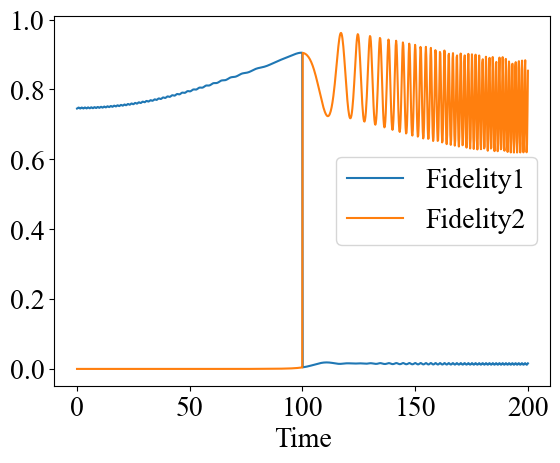

In [104]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

# 定义初始状态
t = 0
T = 100
N = 1000
omega = np.pi / T
r = 0.5
phi_0 = np.pi
p_x_val = p_x(r, omega, phi_0, t)
p_y_val = p_y(r, omega, phi_0, t)
alpha = cacu_alpha(p_x_val, p_y_val)
Phi_0 = np.arctan(1 / (p_x_val + 1j * p_y_val))

# 定义哈密顿量随时间的演化
def H_t(t, args):
    omega = args['omega']
    r = args['r']
    phi_0 = args['phi_0']
    Phi = args['Phi']
    p_x_val = args['p_x_val']
    p_y_val = args['p_y_val']
    alpha = args['alpha']
    p_x_val = p_x(r, omega, phi_0, t)
    p_y_val = p_y(r, omega, phi_0, t)
    alpha = cacu_alpha(p_x_val, p_y_val)
    Phi = np.arctan(1 / (p_x_val + 1j * p_y_val))
    H = full_hami(alpha, np.imag(Phi), np.real(Phi))
    return Qobj(H)

psi0 = Qobj([[-np.sin(Phi_0 / 2)], [np.cos(Phi_0 / 2)]]/np.linalg.norm([[-np.sin(Phi_0 / 2)], [np.cos(Phi_0 / 2)]]))
# 定义时间演化参数
args = {'omega': omega, 'r': r, 'phi_0': phi_0, 'Phi': Phi_0, 'p_x_val': p_x_val, 'p_y_val': p_y_val, 'alpha': alpha}
t_list = np.linspace(0, T * 2, N)
# 计算时间演化
result = sesolve(H_t, psi0, t_list, args=args)
# 提取本征态
states = [state.full() for state in result.states]

# 计算每个时间步的 ita1 和 ita2
fidelity1 = []
fidelity2 = []
for i, t in enumerate(t_list):
    # 归一化处理
    norm_state = states[i] / np.linalg.norm(states[i])
    p_x_val = p_x(r, omega, phi_0, t)
    p_y_val = p_y(r, omega, phi_0, t)
    Phi = np.arctan(1 / (p_x_val + 1j * p_y_val))
    ita1 = np.array([[-np.sin(np.conj(Phi)/2)], [np.cos(np.conj(Phi)/2)]])
    ita2 = np.array([[np.cos(np.conj(Phi)/2)], [np.sin(np.conj(Phi)/2)]])
    fidelity1.append(calculate_fidelity(ita1, norm_state))
    fidelity2.append(calculate_fidelity(ita2, norm_state))
    if i == 0:
        print('states0', norm_state)
        print(calculate_fidelity(ita1, norm_state))
        print(calculate_fidelity(ita1, [[-np.sin(Phi_0 / 2)], [np.cos(Phi_0 / 2)]]))
    elif i == 999:
        print('ita1', ita1)
        print('state999:', norm_state)

fidelity1 = np.array(fidelity1).flatten()
fidelity2 = np.array(fidelity2).flatten()

# 绘制保真度随时间的演化
plt.figure()
plt.plot(t_list, fidelity1, label='Fidelity1')
plt.plot(t_list, fidelity2, label='Fidelity2')
plt.xlabel('Time')

plt.legend()
plt.show()

In [111]:

psi1 = Qobj([[-np.sin(Phi_0 / 2)], [np.cos(Phi_0 / 2)]]/np.linalg.norm([[-np.sin(Phi_0 / 2)], [np.cos(Phi_0 / 2)]]))
psi2 = Qobj([[-np.sin(Phi_0 / 2)], [np.cos(Phi_0 / 2)]])
psi1
psi2

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-2.65024477e-17+4.13304238e-01j]
 [ 1.08204454e+00+1.01230342e-17j]]

In [10]:
import numpy as np
t = 0
T = 100
N = 1000
omega =2*np.pi
r = 0.5
phi_0 = np.pi
p_x_val = p_x(r, omega, phi_0, t)
p_y_val = p_y(r, omega, phi_0, t)
alpha = cacu_alpha(p_x_val, p_y_val)
Phi_0 = np.arctan(1 / (p_x_val + 1j * p_y_val))
array = np.array([[-np.sin(Phi_0 / 2)], [np.cos(Phi_0/2)]])
print(array)
print(p_x_val,p_y_val)

[[-2.65024477e-17+4.13304238e-01j]
 [ 1.08204454e+00+1.01230342e-17j]]
6.123233995736766e-17 1.5


In [11]:
t = 200
omega = np.pi/100
r = 0.5
phi_0 = np.pi
p_x_val = p_x(r, omega, phi_0, t)
p_y_val = p_y(r, omega, phi_0, t)
if t * omega/2 >= np.pi:
    alpha = abs(cacu_alpha(p_x_val, p_y_val))
else:
    alpha = cacu_alpha(p_x_val, p_y_val)
print(alpha)
Phi_0 = np.arctan(1 / (p_x_val + 1j * p_y_val))
H1 = full_hami(alpha, np.imag(Phi_0), np.real(Phi_0))
H2 = pseu_hami(alpha, Phi_0)
eigvals1, eig_1 = np.linalg.eig(H1)
eigvals2, eig_2 = np.linalg.eig(H2)

print(calculate_fidelity(ita2,eig_1))
print(eig_2)

1.1180339887498947
[[7.45355992e-01 4.94691619e-32]]
[[ 9.34172359e-01+0.j         -4.67431219e-17+0.35682209j]
 [ 4.73169564e-17-0.35682209j  9.34172359e-01+0.j        ]]


In [47]:
t = 0
T = 200
N = 200
omega =np.pi/T
r = 0.5
phi_0 = np.pi
print(p_x(r, omega, phi_0, t))
print(p_y(r, omega, phi_0, t))
c = (np.arctan(1/(1j*1.5)))
print(c)
Phi = np.arctan(1 / (p_x_val + 1j * p_y_val))
print(Phi)
psi_1 = np.array([[-np.sin(Phi / 2)], [np.cos(Phi / 2)]])
print(psi_1)
print(states[0])


6.123233995736766e-17
1.5
-0.8047189562170501j
(1.4695761589768238e-16-0.8047189562170501j)
[[-7.95073432e-17+4.13304238e-01j]
 [ 1.08204454e+00+3.03691027e-17j]]
[[-2.28806238e-17+3.5682209e-01j]
 [ 9.34172359e-01+8.7396206e-18j]]
